In [1]:
#import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
data = pd.read_csv("../DATA/student-por.csv")

/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
data.loc[data["school"]=="GP","school"]=0
data.loc[data["school"]=="MS","school"]=1
data.loc[data["sex"]=="M","sex"]=1
data.loc[data["sex"]=="F","sex"]=0
data.loc[data["address"]=="U","address"]=1
data.loc[data["address"]=="R","address"]=0
data.loc[data["famsize"]=="GT3","famsize"]=1
data.loc[data["famsize"]=="LE3","famsize"]=0
data.loc[data["Pstatus"]=="A","Pstatus"]=0
data.loc[data["Pstatus"]=="T","Pstatus"]=1
data.loc[data["Mjob"]=="teacher","Mjob"]=0
data.loc[data["Mjob"]=="health","Mjob"]=1
data.loc[data["Mjob"]=="services","Mjob"]=2
data.loc[data["Mjob"]=="at_home","Mjob"]=3
data.loc[data["Mjob"]=="other","Mjob"]=4
data.loc[data["Fjob"]=="teacher","Fjob"]=0
data.loc[data["Fjob"]=="health","Fjob"]=1
data.loc[data["Fjob"]=="services","Fjob"]=2
data.loc[data["Fjob"]=="at_home","Fjob"]=3
data.loc[data["Fjob"]=="other","Fjob"]=4
data.loc[data["reason"]=="home","reason"]=0
data.loc[data["reason"]=="reputation","reason"]=1
data.loc[data["reason"]=="course","reason"]=2
data.loc[data["reason"]=="other","reason"]=3
data.loc[data["guardian"]=="mother","guardian"]=0
data.loc[data["guardian"]=="father","guardian"]=1
data.loc[data["guardian"]=="other","guardian"]=2
data.loc[data["schoolsup"]=="yes","schoolsup"]=1
data.loc[data["schoolsup"]=="no","schoolsup"]=0
data.loc[data["famsup"]=="yes","famsup"]=1
data.loc[data["famsup"]=="no","famsup"]=0
data.loc[data["paid"]=="yes","paid"]=1
data.loc[data["paid"]=="no","paid"]=0
data.loc[data["activities"]=="yes","activities"]=1
data.loc[data["activities"]=="no","activities"]=0
data.loc[data["nursery"]=="yes","nursery"]=1
data.loc[data["nursery"]=="no","nursery"]=0
data.loc[data["higher"]=="yes","higher"]=1
data.loc[data["higher"]=="no","higher"]=0
data.loc[data["internet"]=="yes","internet"]=1
data.loc[data["internet"]=="no","internet"]=0
data.loc[data["romantic"]=="yes","romantic"]=1
data.loc[data["romantic"]=="no","romantic"]=0


if 'new' not in data:
    data.insert(33,'new',0)

for i in range(0,len(data)):
    data.loc[data['G3'] <= 7, 'new'] = 0
    #data.loc[(data['G3']>7) & (data['G3']<=14) , 'new'] = 1
    data.loc[data['G3'] >7, 'new'] = 1

In [3]:
df=data
print ("Dataset Lenght:: ", len(data))
print ("Dataset Shape:: ", data.shape)

Dataset Lenght::  649
Dataset Shape::  (649, 34)


In [4]:
print ("Dataset:: ")
data.head()

Dataset:: 


school sex  age address famsize Pstatus  Medu  Fedu Mjob Fjob ... freetime  \
0      0   0   18       1       1       0     4     4    3    0 ...        3   
1      0   0   17       1       1       1     1     1    3    4 ...        3   
2      0   0   15       1       0       1     1     1    3    4 ...        3   
3      0   0   15       1       1       1     4     2    1    2 ...        2   
4      0   0   16       1       1       1     3     3    4    4 ...        3   

  goout  Dalc  Walc  health absences  G1  G2  G3 new  
0     4     1     1       3        4   0  11  11   1  
1     3     1     1       3        2   9  11  11   1  
2     2     2     3       3        6  12  13  12   1  
3     2     1     1       5        0  14  14  14   1  
4     2     1     2       5        0  11  13  13   1  

[5 rows x 34 columns]

In [7]:
rural_data = data[data['address'] == 0]
urban_data = data[data['address'] == 1]

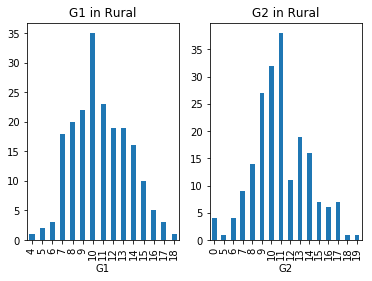

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2)
rural_data.groupby(['G1']).size().plot(kind='bar',ax=ax[0], title='G1 in Rural')
rural_data.groupby(['G2']).size().plot(kind='bar',ax=ax[1], title='G2 in Rural')
#plt.show()

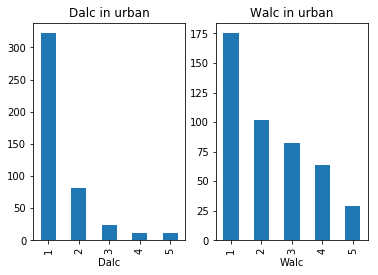

In [13]:
fig, ax = plt.subplots(1,2)
urban_data.groupby(['Dalc']).size().plot(kind='bar',ax=ax[0], title='Dalc in urban')
urban_data.groupby(['Walc']).size().plot(kind='bar',ax=ax[1], title='Walc in urban')

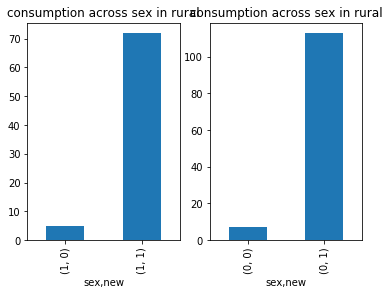

In [16]:
# Daily performance across sex in rural areas
fig, ax = plt.subplots(1,2)

rural_df = rural_data[['sex','new']]
rural_df = rural_df[rural_df['sex'] == 1]
rural_df.groupby(['sex','new']).size().plot(kind='bar', ax=ax[0], title="consumption across sex in rural")

rural_df = rural_data[['sex', 'new']]
rural_df = rural_df[rural_df['sex'] == 0]
rural_df.groupby(['sex', 'new']).size().plot(kind='bar', ax=ax[1], title="consumption across sex in rural")

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


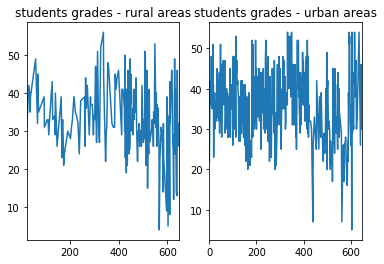

In [17]:
# total grades in rural and urban areas

fig, ax = plt.subplots(1,2)

rural_df = rural_data[['G1','G2','G3']]
rural_df['total'] = rural_df.apply(sum, axis=1)
rural_df

rural_df['total'].plot(ax=ax[0], title="students grades - rural areas")

urban_df = urban_data[['G1', 'G2', 'G3']]
urban_df['total'] = urban_df.apply(sum, axis=1)
urban_df['total'].plot(ax=ax[1], title="students grades - urban areas")

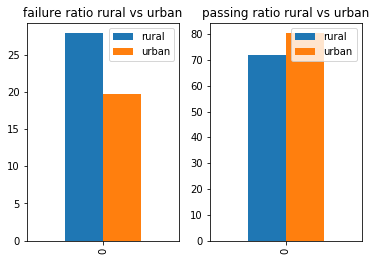

In [19]:
# past failures and passing ratios in rural and urban areas
fig, ax = plt.subplots(1,2)

rural_failure_ratio = (1.0 * rural_data['failures'].sum()) / len(rural_data) *100

urban_failure_ratio = (1.0 * urban_data['failures'].sum()) / len(urban_data) * 100

failure_df = pd.DataFrame({'rural' : [rural_failure_ratio,],
                           'urban' : [urban_failure_ratio,]})

rural_passing_ratio = (1 - (1.0 * rural_data['failures'].sum()) / len(rural_data)) * 100

urban_passing_ratio = (1 - (1.0 * urban_data['failures'].sum()) / len(urban_data)) * 100

passing_df = pd.DataFrame({'rural' : [rural_passing_ratio,],
                           'urban' : [urban_passing_ratio,]})

failure_df.plot(kind='bar', legend=True, ax=ax[0], title="failure ratio rural vs urban")
passing_df.plot(kind='bar', ax=ax[1], legend=True, title="passing ratio rural vs urban")

In [20]:
no_romantic = data[data['romantic'] == 0]
romantic = data[data['romantic'] == 1]

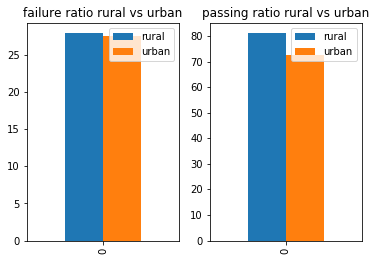

In [21]:
# past failures and passing ratios in rural and urban areas
fig, ax = plt.subplots(1,2)

no_romantic_ratio = (1.0 * no_romantic['failures'].sum()) / len(no_romantic) *100

romantic_ratio = (1.0 * romantic['failures'].sum()) / len(romantic) * 100

failure_df = pd.DataFrame({'rural' : [rural_failure_ratio,],
                           'urban' : [romantic_ratio,]})

rural_passing_ratio = (1 - (1.0 * no_romantic['failures'].sum()) / len(no_romantic)) * 100

urban_passing_ratio = (1 - (1.0 * romantic['failures'].sum()) / len(romantic)) * 100

passing_df = pd.DataFrame({'rural' : [rural_passing_ratio,],
                           'urban' : [urban_passing_ratio,]})

failure_df.plot(kind='bar', legend=True, ax=ax[0], title="failure ratio rural vs urban")
passing_df.plot(kind='bar', ax=ax[1], legend=True, title="passing ratio rural vs urban")

In [22]:
X = data.values[:, 0:29]
Y = data.values[:,33]

In [23]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 100)

In [24]:
tree = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=0)

In [25]:
tree.fit(X_train.astype(int), y_train.astype(int))
print("Accuracy on training set: {:.3f}".format(tree.score(X_train.astype(int),y_train.astype(int))))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test.astype(int),y_test.astype(int))))

Accuracy on training set: 0.967
Accuracy on test set: 0.944


In [26]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", impurity=False, filled=True)

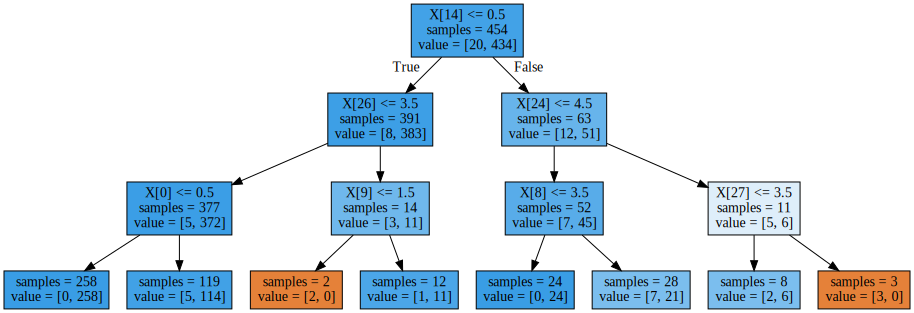

In [27]:
import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [28]:
print("Features importance:\n{}".format(tree.feature_importances_))

Features importance:
[ 0.0215796   0.          0.          0.          0.          0.          0.
  0.          0.12123216  0.2162111   0.          0.          0.          0.
  0.23540305  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.13948821  0.          0.08187598
  0.18420991  0.        ]


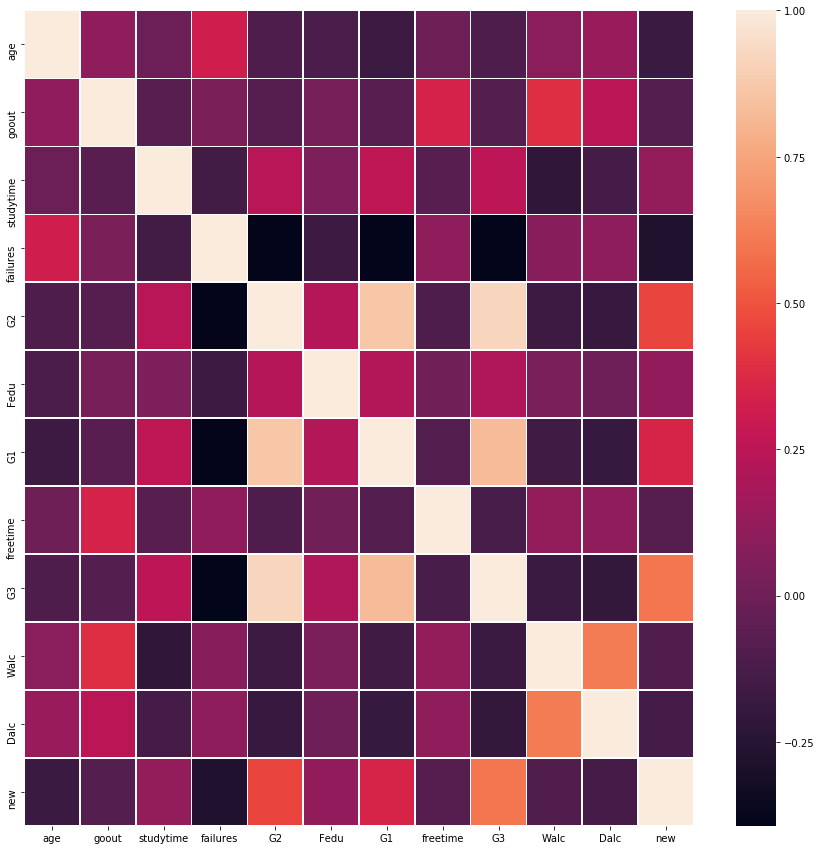

In [29]:
from sklearn.feature_selection import f_regression
data=df
x_vars=list(data.drop('new',axis=1).columns.values) 
Y=data['new'].values
X=data.drop('new',axis=1) 

#produce F scores and p-values
F,p_val=f_regression(X,Y)

#split variables into two groups; statistically significant and insignificant at the 95% confidence level
signif_vars={var_name:p for var_name,p in zip(x_vars,p_val) if p<0.05}
insignif_vars={var_name:p for var_name,p in zip(x_vars,p_val) if p>0.05}

signif_vars

import seaborn as sns
import matplotlib.pyplot as plt
X_sel = data[list(signif_vars.keys())+['new']]

cor_mat = X_sel.corr()

f, ax = plt.subplots(figsize=(15, 15))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(cor_mat,linewidths=.5, ax=ax);

plt.show()

In [30]:
students_transformed = data
students_transformed['male'] = data['sex'] == 1
students_transformed['rural'] = data['address'] == 0
students_transformed['big_family'] = data['famsize'] == 1
students_transformed['parents_together'] = data['Pstatus'] == 1
students_transformed['studies_less'] = data['studytime'] < 3
students_transformed['more_failures'] = data['failures'] >= 2
students_transformed['bad_relationships'] = data['famrel'] <= 2
students_transformed['more_free_time'] = data['freetime'] > 3
students_transformed['goes_out_more'] = data['goout'] > 4
students_transformed['bad_health'] = data['health'] <= 2
students_transformed['high_absences'] = data['absences'] > (data['absences'].std() * 2)
students_transformed['mothers_low_edu'] = data['Medu'] <= 3
students_transformed['fathers_low_edu'] = data['Fedu'] <= 3
students_transformed['more_than_18'] = data['age'] > 18
students_transformed['long_road'] = data['traveltime'] >= 3

sum_grade = data['G1'] + data['G2'] + data['G3']
mean_grade = (sum_grade) / 3 
students_transformed['low_grade'] = mean_grade <= (mean_grade.mean() + mean_grade.std())

students_transformed.drop(['sex', 
                           'address', 
                           'famsize', 
                           'Pstatus', 
                           'studytime', 
                           'failures', 
                           'famrel', 
                           'freetime', 
                           'goout', 
                           'health',
                           'absences',
                           'G1',
                            'G2',
                            'G3',
                           'Medu',
                           'Fedu',
                           'age',
                           'traveltime'], axis = 1, inplace = True)

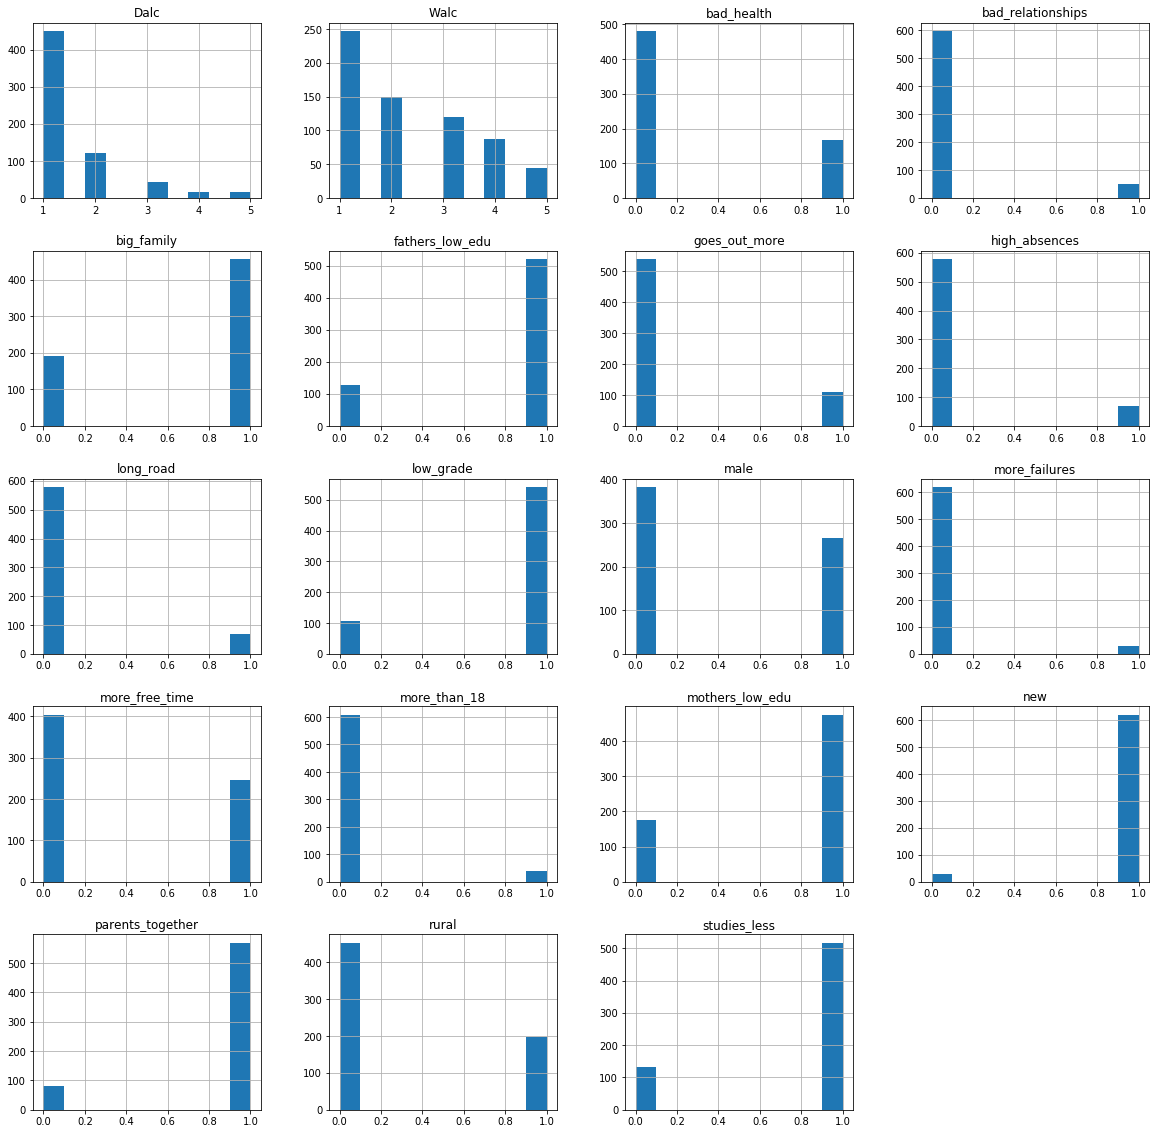

In [31]:
students_transformed.hist(figsize=(20, 20));
import matplotlib.pyplot as plt
plt.show()